In [1]:
import matplotlib.pyplot as plt
import phantom_generator as pg
import pandas as pd

import statistics_calc as sc
import numpy as np

Все фантому будут генерироваться своим алгоритмом гененрации фантомомв:

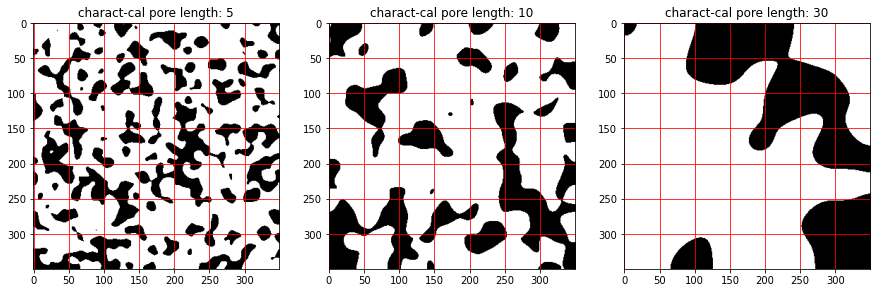

In [2]:
characteristical_lengths = [5, 10, 30]
porosity = 0.3
shape = [350, 350]

phantoms = [pg.gen_phantom(shape, porosity, cl) for cl in characteristical_lengths]

fig, axes = plt.subplots(ncols=3, figsize=(15,5))

for ax, cl, phantom in zip(axes, characteristical_lengths, phantoms):
    ax.imshow(phantom, cmap='gray')
    ax.set_title(f"charact-cal pore length: {cl}")
    ax.grid(color='red')

Будем генерировать фантомы разных пористостей и характеристической длины пор, и измерять у них следующие характеристики:

- Среднюю величину распределения длин ПОР (MEAN_pore_row_length)
- Медиану распределения длин ПОР (median_pore_row_length)
- Среднюю величину распределения длин МАТЕРИАЛА (MEAN_material_row_length)
- Медиану распределения длин МАТЕРИАЛА (median_material_row_length)
- Сумма медиан (sum_medians)
- сумма средних (sum_MEANS)

#TODO: - Диаметры объемов распределения пор

Пористости для генерирования 0.1, 0.15, 0.2, ..., 0.5

Характеристические длины 5, 10, 15, 20, 25, 30

Каждый фантом генерируется sample_count=10 раз (sample_id задается колонкой attempt для каждой попытки)

In [3]:
sample_count = 10
characteristical_pore_lengths = [5, 10, 15, 20, 25, 30]
porosities = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

train_dataframe = pd.DataFrame(columns = ['porosity', 
                                          'characteristical_pore_length',
                                          'sample_id',
                                          'MEAN_pore_row_length',
                                          'median_pore_row_length',
                                          'MEAN_material_row_length',
                                          'median_material_row_length',
                                          'sum_medians',
                                          'sum_MEANS'])


for sample_id in range(sample_count):
    print(f"{sample_id+1} out of {sample_count}")
    for porosity in porosities:
        for characteristical_pore_length in characteristical_pore_lengths:
            phantom = pg.gen_phantom(shape, porosity, characteristical_pore_length)
            stat_zeros, stat_ones = sc.get_row_statistics(phantom, row_numbers="all", axis="both")

            MEAN_pore_row_length = np.mean(stat_zeros)
            MEAN_material_row_length = np.mean(stat_ones)

            median_pore_row_length = np.median(stat_zeros)
            median_material_row_length = np.median(stat_ones)

            train_dataframe = train_dataframe.append({'porosity': porosity,
                                                      'characteristical_pore_length': characteristical_pore_length,
                                                      'sample_id': sample_id,
                                                      'MEAN_pore_row_length': MEAN_pore_row_length,
                                                      'median_pore_row_length': median_pore_row_length,
                                                      'MEAN_material_row_length': MEAN_material_row_length,
                                                      'median_material_row_length': median_material_row_length,
                                                      'sum_medians': median_pore_row_length + median_material_row_length,
                                                      'sum_MEANS': MEAN_pore_row_length + MEAN_material_row_length},
                                                      ignore_index=True)

1 out of 10
2 out of 10
3 out of 10
4 out of 10
5 out of 10
6 out of 10
7 out of 10
8 out of 10
9 out of 10
10 out of 10


In [4]:
train_dataframe

,porosity,characteristical_pore_length,sample_id,MEAN_pore_row_length,median_pore_row_length,MEAN_material_row_length,median_material_row_length,sum_medians,sum_MEANS
0,0.1,5.0,0.0,9.495826,8.0,78.009126,57.0,65.0,87.504952
1,0.1,10.0,0.0,18.857831,17.0,125.366157,90.0,107.0,144.223989
2,0.1,15.0,0.0,22.431414,22.0,164.154185,151.5,173.5,186.585599
3,0.1,20.0,0.0,33.434018,30.0,187.350759,187.0,217.0,220.784776
4,0.1,25.0,0.0,45.289515,44.0,189.526316,211.0,255.0,234.815831
...,...,...,...,...,...,...,...,...,...
535,0.5,10.0,9.0,38.386034,30.0,40.408934,31.0,61.0,78.794968
536,0.5,15.0,9.0,62.444216,45.0,54.933748,43.0,88.0,117.377964
537,0.5,20.0,9.0,82.093180,67.0,81.090670,72.0,139.0,163.183850
538,0.5,25.0,9.0,82.979592,62.0,81.147757,74.5,136.5,164.127349


In [5]:
import data_manager as dm

In [7]:
dm.save_data(train_dataframe, 'train_dataframe.csv')
dm.save_data(train_dataframe, 'train_dataframe.xlsx')